# Đọc dữ liệu

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Yêu cầu 1.3

In [5]:
data = pd.read_csv('train.csv')

In [6]:
print('Số dòng:', data.shape[0])
print('Các cột:')
print(np.array(data.columns))

Số dòng: 1647
Các cột:
['Make' 'Model' 'Price' 'Year' 'Kilometer' 'Fuel Type' 'Transmission'
 'Location' 'Color' 'Owner' 'Seller Type' 'Engine' 'Max Power'
 'Max Torque' 'Drivetrain' 'Length' 'Width' 'Height' 'Seating Capacity'
 'Fuel Tank Capacity']


In [7]:
print('5 Dòng đầu tiên của data:')
data.head()

5 Dòng đầu tiên của data:


,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,BMW,3-Series 320d,800000,2012,75576,Diesel,Automatic,Mumbai,White,Second,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BMW,X1 sDrive20d xLine,2199000,2016,77000,Diesel,Automatic,Surat,Black,First,Individual,1995 cc,184 bhp @ 4000 rpm,350 Nm @ 1750 rpm,RWD,4454.0,2044.0,1545.0,5.0,63.0
2,Mahindra,XUV500 W4 1.99,800000,2017,112000,Diesel,Manual,Muzaffurpur,Silver,First,Individual,1997 cc,138 bhp @ 3750 rpm,320 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
3,Mercedes-Benz,GLS 400d 4MATIC,12900000,2021,3000,Diesel,Automatic,Delhi,White,First,Individual,2925 cc,326 bhp @ 3600 rpm,700 Nm @ 1200 rpm,AWD,5207.0,2157.0,1823.0,7.0,90.0
4,Toyota,Fortuner 2.8 4x2 AT [2016-2020],3499000,2019,73000,Diesel,Automatic,Mumbai,White,First,Individual,2755 cc,174 bhp @ 3400 rpm,450 Nm @ 1600 rpm,RWD,4795.0,1855.0,1835.0,7.0,80.0


In [8]:
def check_catag(name):
    print(data[name].unique().size)
    plt.figure(figsize=(8, 6))
    plt.hist(data[name], bins=10, edgecolor='black', alpha=0.7)
    plt.xlabel(name)
    plt.ylabel("Tần suất")
    plt.title(f"Histogram của {name}")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

912


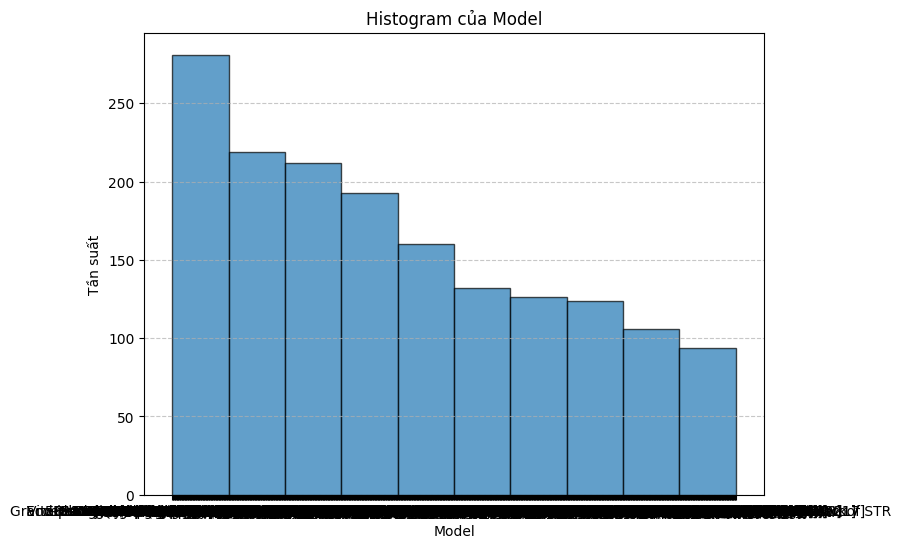

In [9]:
check_catag("Model")

In [10]:
data["Model"].unique().size

912

# Data preprocessing

In [11]:
data.describe()

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,1.647000e+03,1647.000000,1.647000e+03,1595.00000,1595.000000,1595.000000,1595.000000,1557.000000
mean,1.696655e+06,2016.419551,5.420636e+04,4281.47837,1767.580564,1592.423824,5.310345,52.154656
std,2.360649e+06,3.370327,5.849584e+04,448.16458,137.053924,136.360967,0.816002,15.405199
min,4.900000e+04,1988.000000,0.000000e+00,3099.00000,1475.000000,1165.000000,2.000000,15.000000
25%,4.775000e+05,2014.000000,2.900000e+04,3985.00000,1695.000000,1485.000000,5.000000,40.000000
50%,8.250000e+05,2017.000000,5.000000e+04,4370.00000,1775.000000,1550.000000,5.000000,50.000000
75%,1.950000e+06,2019.000000,7.200000e+04,4630.00000,1835.000000,1675.000000,5.000000,60.000000
max,2.750000e+07,2022.000000,2.000000e+06,5569.00000,2220.000000,1995.000000,8.000000,105.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1647 entries, 0 to 1646
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1647 non-null   object 
 1   Model               1647 non-null   object 
 2   Price               1647 non-null   int64  
 3   Year                1647 non-null   int64  
 4   Kilometer           1647 non-null   int64  
 5   Fuel Type           1647 non-null   object 
 6   Transmission        1647 non-null   object 
 7   Location            1647 non-null   object 
 8   Color               1647 non-null   object 
 9   Owner               1647 non-null   object 
 10  Seller Type         1647 non-null   object 
 11  Engine              1582 non-null   object 
 12  Max Power           1582 non-null   object 
 13  Max Torque          1582 non-null   object 
 14  Drivetrain          1536 non-null   object 
 15  Length              1595 non-null   float64
 16  Width 

In [13]:
data["Engine"] = data["Engine"].str.replace(' cc', '', regex=False).astype(float)

In [14]:
def extract_max_power(power_str):
    if isinstance(power_str, float):
        return np.nan, np.nan
    parts = power_str.split('@')
    bhp_part = parts[0]
    rpm_part = parts[1]
    bhp_value = float(bhp_part.split(' bhp')[0])
    try:
        rpm_value = float(rpm_part.split(' rpm')[0])
    except:
        return bhp_value, np.nan
    return bhp_value, rpm_value

data[['Max Power bhp', 'Max Power rpm']] = data['Max Power'].apply(lambda x: pd.Series(extract_max_power(x)))
data.drop(columns=['Max Power'], inplace=True)

In [15]:
def extract_max_power(power_str):
    if isinstance(power_str, float):
        return np.nan, np.nan
    parts = power_str.split('@')
    bhp_part = parts[0]
    rpm_part = parts[1]
    bhp_value = float(bhp_part.split(' Nm')[0])
    try:
        rpm_value = float(rpm_part.split(' rpm')[0])
    except:
        return bhp_value, np.nan
    return bhp_value, rpm_value

data[['Max Torque Nm', 'Max Torque rpm']] = data['Max Torque'].apply(lambda x: pd.Series(extract_max_power(x)))
data.drop(columns=['Max Torque'], inplace=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1647 entries, 0 to 1646
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1647 non-null   object 
 1   Model               1647 non-null   object 
 2   Price               1647 non-null   int64  
 3   Year                1647 non-null   int64  
 4   Kilometer           1647 non-null   int64  
 5   Fuel Type           1647 non-null   object 
 6   Transmission        1647 non-null   object 
 7   Location            1647 non-null   object 
 8   Color               1647 non-null   object 
 9   Owner               1647 non-null   object 
 10  Seller Type         1647 non-null   object 
 11  Engine              1582 non-null   float64
 12  Drivetrain          1536 non-null   object 
 13  Length              1595 non-null   float64
 14  Width               1595 non-null   float64
 15  Height              1595 non-null   float64
 16  Seatin

In [17]:
for col in data.columns:
    if data[col].dtype == 'object':
        data[col].fillna(data[col].mode()[0], inplace=True)
    else:
        data[col].fillna(data[col].median(), inplace=True)

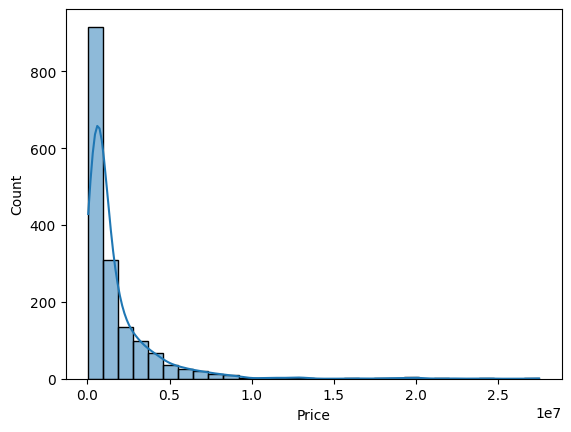

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data["Price"], kde=True, bins=30)
plt.show()

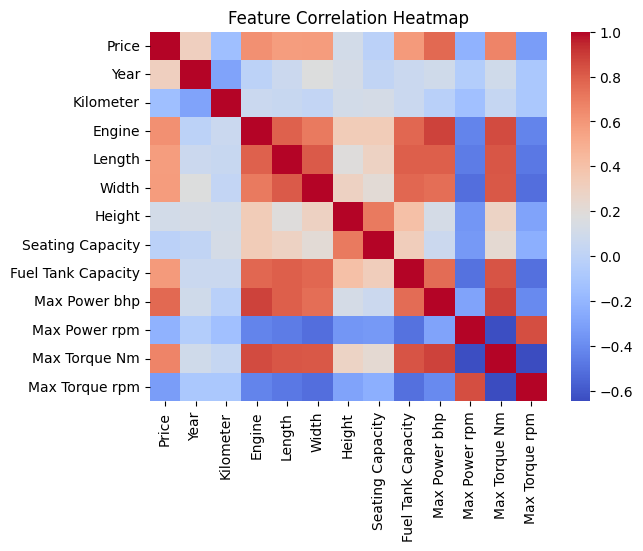

In [19]:
numeric_data = data.select_dtypes(include=['number'])

# Compute correlation
corr_matrix = numeric_data.corr()

sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

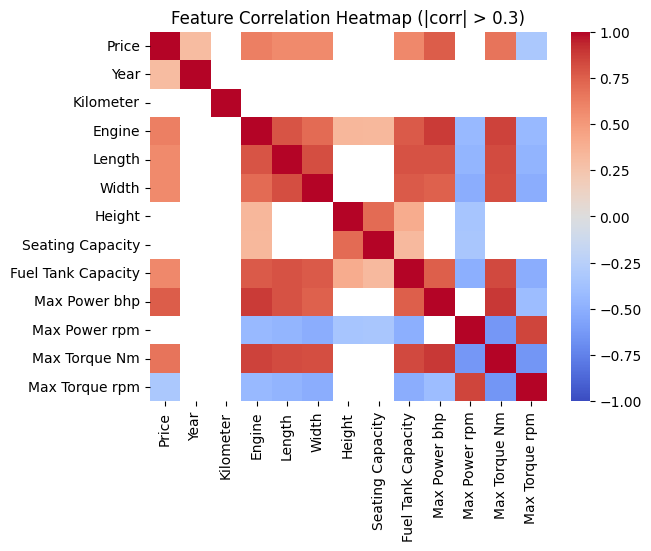

In [20]:
filtered_corr = corr_matrix[abs(corr_matrix) > 0.3]
sns.heatmap(filtered_corr, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Feature Correlation Heatmap (|corr| > 0.3)")
plt.show()